In [1]:
print('\nInitializing 2ES Target Selection Pipeline...')

from config import *
from gaia_queries import *
from data_processing import *
from plotting import *
from stellar_calculations import *
from utils import *
from catalog_integration import CatalogProcessor
from filtering import filter_stellar_data
from gaia_tess_overlap import match_gaia_tess, save_overlapping_stars


Initializing 2ES Target Selection Pipeline...


In [3]:
# Execute DR2 query
df_dr2 = execute_gaia_query(
    get_dr2_query(),
    str_columns=['source_id'],
    output_file=f"{RESULTS_DIRECTORY}dr2_results.xlsx"
)

# Execute crossmatch query
dr2_source_ids = tuple(df_dr2['source_id'])
df_crossmatch = execute_gaia_query(
    get_crossmatch_query(dr2_source_ids),
    str_columns=['dr2_source_id', 'dr3_source_id'],
    output_file=f"{RESULTS_DIRECTORY}dr2_dr3_crossmatch.xlsx"
)

# Execute DR3 query
df_dr3 = execute_gaia_query(
    get_dr3_query(),
    str_columns=['source_id'],
    output_file=f"{RESULTS_DIRECTORY}dr3_results.xlsx"
)




Querying stars from Gaia DR2
9463 stars retrieved
Query results saved to ../results/dr2_results.xlsx

Crossmatching stellar IDs between Gaia DR2 and DR3
10053 stars retrieved
Query results saved to ../results/dr2_dr3_crossmatch.xlsx

Querying stars from Gaia DR3
9157 stars retrieved
Query results saved to ../results/dr3_results.xlsx


In [4]:
# Process and clean data
merged_results = process_gaia_data(df_dr2, df_dr3, df_crossmatch)
clean_results = clean_merged_results(merged_results)



Merging Gaia DR2 and DR3 data with crossmatch information
Results saved to ../results/merged_results.xlsx

Cleaning merged results by removing duplicate dr2_source_id entries
Results saved to ../results/repeated_entries.xlsx

Processing repeated entries with the same dr2_source_id
Results saved to ../results/clean_merged_results.xlsx
Results saved to ../results/removed_rows.xlsx
Original shape of merged_results: (10319, 29)
Shape after removing duplicates: (9727, 29)
Number of rows removed: 592


In [6]:
consolidated_results = consolidate_data(clean_results[:100])


Consolidating data between DR2 and DR3
Merging the following columns between DR2 and DR3: ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, logg_gaia, spectraltype_esphs
Processing temperature
Processing the following columns: mass_flame, lum_flame, radius_flame, spectraltype_esphs
Adding bp_rp column


Retrieving 'HD Number', 'GJ Number', 'HIP Number', and 'Object Type' from Simbad: 100%|██████████| 100/100 [00:15<00:00,  6.63it/s]


Renaming columns
Results saved to ../results/consolidated_results.xlsx
Total number of stars: 100
Number of stars with DR3 source_id: 93
Number of stars with only DR2 source_id: 7
Number of stars with HD Number: 46
Number of stars with GJ Number: 22
Number of stars with HIP Number: 52


In [8]:
    processor = CatalogProcessor(
        celesta_path ='../data/Catalogue_CELESTA.txt',
        stellar_catalog_path ='../data/Catalogue_V_117A_table1.txt'
    )
    df_consolidated = processor.process_catalogs(consolidated_results)


Filling missing T_eff and Luminosity from CELESTA catalog using HIP numbers
Results saved to ../results/consolidated_HIP_results.xlsx

Filling missing T_eff, Luminosity and Mass from Vizier V/117A using HD numbers


Progress: 100%|███████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.11it/s]


Results saved to ../results/consolidated_HD_results.xlsx

Getting empirical stellar parameters


Processing stellar types:   1%|▎                                    | 1/100 [00:00<01:35,  1.04it/s]

0: 100254161710940928, None --> None


Processing stellar types:   2%|▋                                    | 2/100 [00:01<01:33,  1.05it/s]

1: 100380639907919872, None --> None


Processing stellar types:   3%|█                                    | 3/100 [00:02<01:35,  1.02it/s]

2: 100586763978318208, None --> None


Processing stellar types:   4%|█▍                                   | 4/100 [00:03<01:36,  1.01s/it]

3: 100665065526715008, None --> None


Processing stellar types:   5%|█▊                                   | 5/100 [00:04<01:33,  1.01it/s]

4: 101283987497967360, None --> None


Processing stellar types:   6%|██▏                                  | 6/100 [00:05<01:31,  1.03it/s]

5: 101309452355657216, None --> None


Processing stellar types:   7%|██▌                                  | 7/100 [00:06<01:31,  1.01it/s]

6: 101489256866566528, None --> None


Processing stellar types:   8%|██▉                                  | 8/100 [00:07<01:29,  1.03it/s]

7: 101612981989146752, None --> None


Processing stellar types:   9%|███▎                                 | 9/100 [00:08<01:33,  1.03s/it]

8: 102082409030066560, None --> None


Processing stellar types:  10%|███▌                                | 10/100 [00:09<01:31,  1.02s/it]

9: 102082477749475200, None --> None


Processing stellar types:  11%|███▉                                | 11/100 [00:10<01:28,  1.00it/s]

10: 102162639019033600, None --> None


Processing stellar types:  12%|████▎                               | 12/100 [00:11<01:26,  1.02it/s]

11: 102648588798884736, None --> None


Processing stellar types:  13%|████▋                               | 13/100 [00:12<01:25,  1.02it/s]

12: 103124230657005568, None --> None


Processing stellar types:  14%|█████                               | 14/100 [00:13<01:23,  1.03it/s]

13: 103173223348678144, None --> None


Processing stellar types:  15%|█████▍                              | 15/100 [00:14<01:22,  1.03it/s]

14: 103363168277756928, None --> None


Processing stellar types:  16%|█████▊                              | 16/100 [00:15<01:24,  1.00s/it]

15: 103649316178540416, None --> None


Processing stellar types:  17%|██████                              | 17/100 [00:16<01:21,  1.02it/s]

16: 103942679624729088, None --> None


Processing stellar types:  18%|██████▍                             | 18/100 [00:17<01:24,  1.03s/it]

17: 104453918172129792, None --> None


Processing stellar types:  19%|██████▊                             | 19/100 [00:18<01:21,  1.01s/it]

18: 104716907609412352, None --> None


Processing stellar types:  20%|███████▏                            | 20/100 [00:19<01:21,  1.02s/it]

19: 104717285566534016, None --> None


Processing stellar types:  21%|███████▌                            | 21/100 [00:20<01:19,  1.00s/it]

20: 104752950974981760, None --> None


Processing stellar types:  22%|███████▉                            | 22/100 [00:21<01:16,  1.02it/s]

21: 105332908999068032, None --> None


Processing stellar types:  23%|████████▎                           | 23/100 [00:22<01:15,  1.02it/s]

22: 105599987244856064, None --> None


Processing stellar types:  24%|████████▋                           | 24/100 [00:23<01:13,  1.04it/s]

23: 10584899657116672, None --> None


Processing stellar types:  25%|█████████                           | 25/100 [00:24<01:11,  1.05it/s]

24: 105850121845012608, None --> None


Processing stellar types:  26%|█████████▎                          | 26/100 [00:25<01:12,  1.02it/s]

25: 106051542927008128, None --> None


Processing stellar types:  27%|█████████▋                          | 27/100 [00:26<01:12,  1.01it/s]

26: 10608573516849536, None --> None


Processing stellar types:  28%|██████████                          | 28/100 [00:27<01:11,  1.01it/s]

27: 106774952858617088, None --> None


Processing stellar types:  29%|██████████▍                         | 29/100 [00:28<01:09,  1.02it/s]

28: 107175480033033472, None --> None


Processing stellar types:  30%|██████████▊                         | 30/100 [00:29<01:11,  1.02s/it]

29: 107774198474602368, None --> None


Processing stellar types:  31%|███████████▏                        | 31/100 [00:30<01:08,  1.00it/s]

30: 107774202769886848, None --> None


Processing stellar types:  32%|███████████▌                        | 32/100 [00:31<01:07,  1.01it/s]

31: 108421608959951488, None --> None


Processing stellar types:  33%|███████████▉                        | 33/100 [00:32<01:08,  1.02s/it]

32: 109051246870008448, None --> None


Processing stellar types:  34%|████████████▏                       | 34/100 [00:33<01:05,  1.00it/s]

33: 109628013733250304, None --> None


Processing stellar types:  35%|████████████▌                       | 35/100 [00:34<01:03,  1.02it/s]

34: 109931856900594432, None --> None


Processing stellar types:  36%|████████████▉                       | 36/100 [00:35<01:04,  1.00s/it]

35: 11037726649058432, None --> None


Processing stellar types:  37%|█████████████▎                      | 37/100 [00:36<01:01,  1.02it/s]

36: 111379432679196672, None --> None


Processing stellar types:  38%|█████████████▋                      | 38/100 [00:37<01:00,  1.03it/s]

37: 11210418694164864, None --> None


Processing stellar types:  39%|██████████████                      | 39/100 [00:38<00:58,  1.03it/s]

38: 112440873718983680, None --> None


Processing stellar types:  40%|██████████████▍                     | 40/100 [00:39<00:57,  1.04it/s]

39: 114207651462714880, None --> None


Processing stellar types:  41%|██████████████▊                     | 41/100 [00:40<00:59,  1.00s/it]

40: 114575472461716864, None --> None


Processing stellar types:  42%|███████████████                     | 42/100 [00:41<00:57,  1.01it/s]

41: 114832620743735808, None --> None


Processing stellar types:  43%|███████████████▍                    | 43/100 [00:42<00:57,  1.00s/it]

42: 11530342218200448, None --> None


Processing stellar types:  44%|███████████████▊                    | 44/100 [00:43<00:55,  1.02it/s]

43: 115311458058061440, None --> None


Processing stellar types:  45%|████████████████▏                   | 45/100 [00:44<00:55,  1.01s/it]

44: 1153462739205798528, None --> None


Processing stellar types:  46%|████████████████▌                   | 46/100 [00:45<00:53,  1.02it/s]

45: 115364234616059392, None --> None


Processing stellar types:  47%|████████████████▉                   | 47/100 [00:46<00:53,  1.01s/it]

46: 1154336202410495488, None --> None


Processing stellar types:  48%|█████████████████▎                  | 48/100 [00:47<00:51,  1.00it/s]

47: 1154866579332084992, None --> None


Processing stellar types:  49%|█████████████████▋                  | 49/100 [00:48<00:50,  1.01it/s]

48: 1155276250492687616, None --> None


Processing stellar types:  50%|██████████████████                  | 50/100 [00:49<00:48,  1.03it/s]

49: 1156350542072311936, None --> None


Processing stellar types:  51%|██████████████████▎                 | 51/100 [00:50<00:47,  1.04it/s]

50: 1156846524895814144, None --> None


Processing stellar types:  52%|██████████████████▋                 | 52/100 [00:51<00:46,  1.04it/s]

51: 1157670986817726976, None --> None


Processing stellar types:  53%|███████████████████                 | 53/100 [00:52<00:44,  1.04it/s]

52: 1157737335472646016, None --> None


Processing stellar types:  54%|███████████████████▍                | 54/100 [00:53<00:44,  1.04it/s]

53: 1158184012071254400, None --> None


Processing stellar types:  55%|███████████████████▊                | 55/100 [00:54<00:44,  1.01it/s]

54: 1158503591997923072, None --> None


Processing stellar types:  56%|████████████████████▏               | 56/100 [00:55<00:42,  1.03it/s]

55: 1159380486880813952, None --> None


Processing stellar types:  57%|████████████████████▌               | 57/100 [00:56<00:42,  1.01it/s]

56: 1159502154714284544, None --> None


Processing stellar types:  58%|████████████████████▉               | 58/100 [00:57<00:40,  1.03it/s]

57: 1159502498311670144, None --> None


Processing stellar types:  59%|█████████████████████▏              | 59/100 [00:58<00:41,  1.01s/it]

58: 1159605302648975104, None --> None


Processing stellar types:  60%|█████████████████████▌              | 60/100 [00:59<00:39,  1.00it/s]

59: 1159745146784043264, None --> None


Processing stellar types:  61%|█████████████████████▉              | 61/100 [01:00<00:38,  1.01it/s]

60: 1160184436039120128, None --> None


Processing stellar types:  62%|██████████████████████▎             | 62/100 [01:01<00:37,  1.03it/s]

61: 116037204451525376, None --> None


Processing stellar types:  63%|██████████████████████▋             | 63/100 [01:02<00:36,  1.03it/s]

62: 116037371954842240, None --> None


Processing stellar types:  64%|███████████████████████             | 64/100 [01:03<00:34,  1.04it/s]

63: 1160612111702571776, None --> None


Processing stellar types:  65%|███████████████████████▍            | 65/100 [01:04<00:34,  1.02it/s]

64: 1160716496587849088, None --> None


Processing stellar types:  66%|███████████████████████▊            | 66/100 [01:05<00:33,  1.03it/s]

65: 1160956465000504448, None --> None


Processing stellar types:  67%|████████████████████████            | 67/100 [01:06<00:32,  1.03it/s]

66: 1161042158187967232, None --> None


Processing stellar types:  68%|████████████████████████▍           | 68/100 [01:07<00:31,  1.03it/s]

67: 1161759314647344896, None --> None


Processing stellar types:  69%|████████████████████████▊           | 69/100 [01:08<00:30,  1.00it/s]

68: 1161797900633510144, None --> None


Processing stellar types:  70%|█████████████████████████▏          | 70/100 [01:09<00:30,  1.00s/it]

69: 116261779701601152, None --> None


Processing stellar types:  71%|█████████████████████████▌          | 71/100 [01:10<00:29,  1.03s/it]

70: 1162946718486550272, None --> None


Processing stellar types:  72%|█████████████████████████▉          | 72/100 [01:11<00:28,  1.00s/it]

71: 1163192665493054336, None --> None


Processing stellar types:  73%|██████████████████████████▎         | 73/100 [01:12<00:27,  1.00s/it]

72: 116339982465090048, None --> None


Processing stellar types:  74%|██████████████████████████▋         | 74/100 [01:13<00:25,  1.01it/s]

73: 1163549697534289664, None --> None


Processing stellar types:  75%|███████████████████████████         | 75/100 [01:14<00:24,  1.02it/s]

74: 1164145048721331968, None --> None


Processing stellar types:  76%|███████████████████████████▎        | 76/100 [01:15<00:23,  1.02it/s]

75: 116456668137575040, None --> None


Processing stellar types:  77%|███████████████████████████▋        | 77/100 [01:16<00:23,  1.02s/it]

76: 1165262633571848064, None --> None


Processing stellar types:  78%|████████████████████████████        | 78/100 [01:17<00:21,  1.01it/s]

77: 1165859359148269568, None --> None


Processing stellar types:  79%|████████████████████████████▍       | 79/100 [01:18<00:21,  1.04s/it]

78: 1166203712446038912, None --> None


Processing stellar types:  80%|████████████████████████████▊       | 80/100 [01:19<00:20,  1.01s/it]

79: 1166216253750406144, None --> None


Processing stellar types:  81%|█████████████████████████████▏      | 81/100 [01:20<00:19,  1.03s/it]

80: 1166577855636534144, None --> None


Processing stellar types:  82%|█████████████████████████████▌      | 82/100 [01:21<00:18,  1.00s/it]

81: 1167718049194619136, None --> None


Processing stellar types:  83%|█████████████████████████████▉      | 83/100 [01:22<00:17,  1.01s/it]

82: 1167718049194619264, None --> None


Processing stellar types:  84%|██████████████████████████████▏     | 84/100 [01:23<00:15,  1.01it/s]

83: 1167838720595878400, None --> None


Processing stellar types:  85%|██████████████████████████████▌     | 85/100 [01:24<00:15,  1.05s/it]

84: 1168984617870183808, None --> None


Processing stellar types:  86%|██████████████████████████████▉     | 86/100 [01:25<00:14,  1.02s/it]

85: 1169984108299812608, None --> None


Processing stellar types:  87%|███████████████████████████████▎    | 87/100 [01:26<00:13,  1.02s/it]

86: 1170092547633728256, None --> None


Processing stellar types:  88%|███████████████████████████████▋    | 88/100 [01:27<00:11,  1.00it/s]

87: 1170098251350303616, None --> None


Processing stellar types:  89%|████████████████████████████████    | 89/100 [01:28<00:11,  1.07s/it]

88: 1170359243627867904, None --> None


Processing stellar types:  90%|████████████████████████████████▍   | 90/100 [01:29<00:10,  1.03s/it]

89: 1170797781264303616, None --> None


Processing stellar types:  91%|████████████████████████████████▊   | 91/100 [01:30<00:09,  1.03s/it]

90: 1171453979251962624, None --> None


Processing stellar types:  92%|█████████████████████████████████   | 92/100 [01:31<00:08,  1.02s/it]

91: 1171574685013520640, None --> None


Processing stellar types:  93%|█████████████████████████████████▍  | 93/100 [01:32<00:07,  1.06s/it]

92: 1172340086840027264, None --> None


Processing stellar types:  94%|█████████████████████████████████▊  | 94/100 [01:33<00:06,  1.04s/it]

93: 1173206811240350592, None --> None


Processing stellar types:  95%|██████████████████████████████████▏ | 95/100 [01:34<00:05,  1.05s/it]

94: 1173847139324624256, None --> None


Processing stellar types:  96%|██████████████████████████████████▌ | 96/100 [01:35<00:04,  1.04s/it]

95: 1173992103060678272, None --> None


Processing stellar types:  97%|██████████████████████████████████▉ | 97/100 [01:36<00:03,  1.03s/it]

96: 1174143182830505856, None --> None


Processing stellar types:  98%|███████████████████████████████████▎| 98/100 [01:37<00:02,  1.01s/it]

97: 1174143182830505984, None --> None


Processing stellar types:  99%|███████████████████████████████████▋| 99/100 [01:38<00:01,  1.08s/it]

98: 1174189362318863488, None --> None


Processing stellar types: 100%|███████████████████████████████████| 100/100 [01:39<00:00,  1.00it/s]

99: 1174513645233715584, None --> None
Results saved to ../results/consolidated_Simbad_results.xlsx



Plotting density vs logg
Saved ../figures/density_vs_logg_full.png
Saved ../figures/density_vs_logg_zoom.png

Filtering stars based on stellar parameters
Total initial: 100
Has temp and lum: 78
Has all params: 53
Kept: 48
Removed: 52

Plotting color histogram
Saved ../figures/color_histogram.png

Plotting color magnitude diagram
Saved ../figures/color_magnitude_diagram.png

Calculating and inserting habitable zone limits
Results saved to ../results/consolidated_results.xlsx

Calculating and inserting RV precision for each star
Results saved to ../results/combined_query_with_RV_precision.xlsx

Calculating and inserting habitable zone detection limits
Number of NaN values in HZ Detection Limit [M_Earth]: 1
Results saved to ../results/combined_query_with_mass_detection_limit.xlsx

Analyzing stars to identify those with bright neighboring stars


Parallel processing for detecting bright neighbors: 100%|███████████| 48/48 [00:06<00:00,  7.77it/s]

Stars with bright neighbors: 1
Stars without bright neighbors: 47
Results saved to ../results/stars_with_bright_neighbors.xlsx
Results saved to ../results/stars_without_bright_neighbors.xlsx


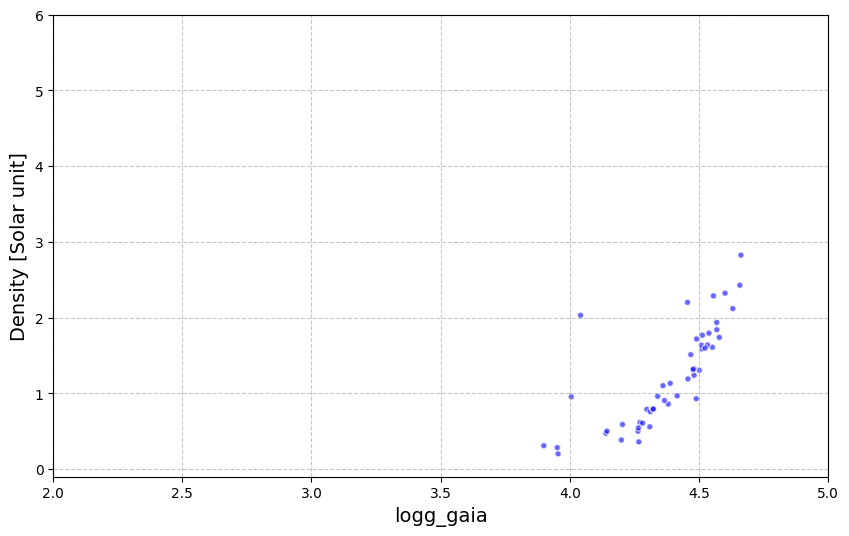

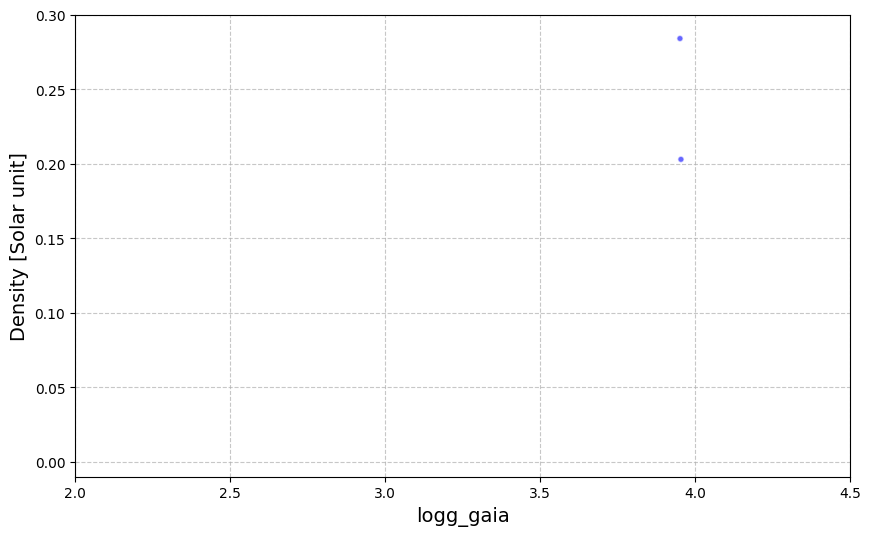

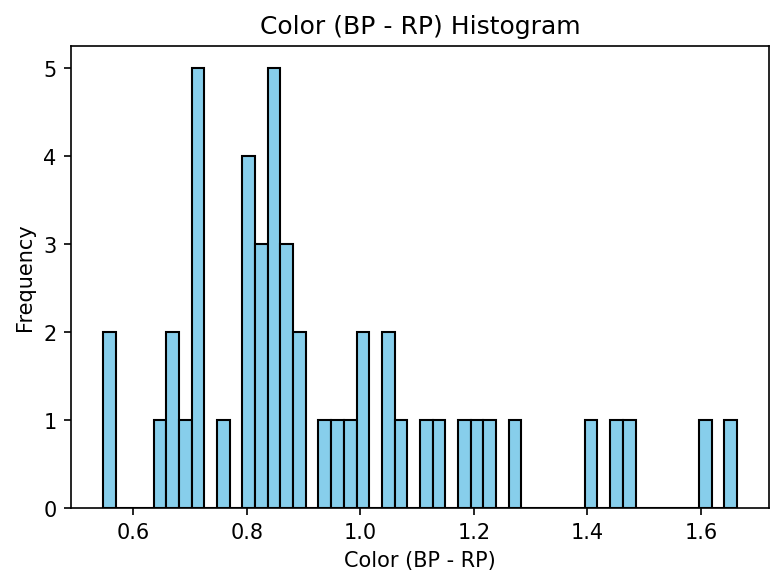

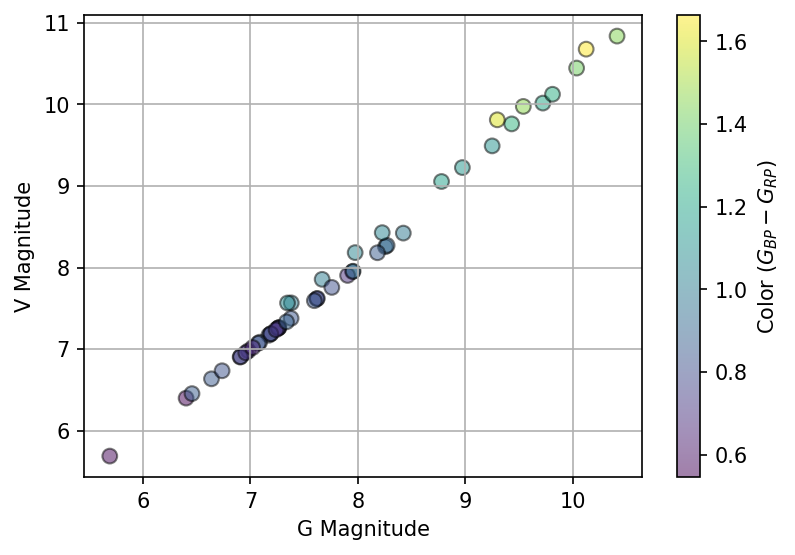

In [9]:
    # Plot density vs logg
    plot_density_vs_logg(
        df_consolidated, 
        output_path=f'{FIGURES_DIRECTORY}density_vs_logg.png', 
        show_plot=False
    )

    df_filtered = filter_stellar_data(df_consolidated, STELLAR_FILTERS)

    plot_color_histogram(
        df_filtered,
        output_path=f'{FIGURES_DIRECTORY}color_histogram.png',
        show_plot=False
    )

    combined_df = plot_color_magnitude_diagram(
        df_filtered,
        output_path=f'{FIGURES_DIRECTORY}color_magnitude_diagram.png',
        show_plot=False
    )

    df_with_hz = calculate_and_insert_habitable_zone(combined_df)
    df_with_rv = calculate_and_insert_rv_precision(df_with_hz)
    merged_df = calculate_and_insert_hz_detection_limit(df_with_rv)

    df_with_bright_neighbors, df_without_bright_neighbors = analyze_bright_neighbors(
        merged_df=merged_df,
        search_radius=SEARCH_RADIUS,
        execute_gaia_query_func=execute_gaia_query
    )

In [33]:
from astroquery.simbad import Simbad
import time
import re

def get_simbad_info_with_retry(gaia_identifier, max_retries=3, delay=1):
    """
    Query SIMBAD with Gaia identifier and extract specific catalog numbers
    
    Parameters:
    -----------
    gaia_identifier : str
        Full Gaia identifier (e.g., 'Gaia DR3 2452378776434477184')
    max_retries : int
        Maximum number of retry attempts
    delay : float
        Delay between retries in seconds
    
    Returns:
    --------
    dict or None
        Dictionary containing HD Number, GJ Number, HIP Number, and Object Type
        Returns None if query fails or object not found
    """
    
    # Configure SIMBAD to return identifiers and object type
    Simbad.reset_votable_fields()
    Simbad.add_votable_fields('ids', 'otype', 'main_id')
    
    for attempt in range(max_retries):
        try:
            # Query SIMBAD with the Gaia identifier
            result = Simbad.query_object(gaia_identifier)
            
            if result is None or len(result) == 0:
                return None
            
            # Extract the identifiers and object type
            ids_string = ""
            object_type = ""
            main_id = ""
            
            # Handle different possible column names
            if 'IDS' in result.colnames:
                ids_string = str(result['IDS'][0])
            elif 'ids' in result.colnames:
                ids_string = str(result['ids'][0])
                
            if 'OTYPE' in result.colnames:
                object_type = str(result['OTYPE'][0])
            elif 'otype' in result.colnames:
                object_type = str(result['otype'][0])
                
            if 'MAIN_ID' in result.colnames:
                main_id = str(result['MAIN_ID'][0])
            elif 'main_id' in result.colnames:
                main_id = str(result['main_id'][0])
            
            # Initialize result dictionary
            simbad_info = {
                'HD Number': None,
                'GJ Number': None, 
                'HIP Number': None,
                'Object Type': object_type.strip() if object_type else None
            }
            
            # Parse identifiers from both ids_string and main_id
            all_identifiers = []
            
            if ids_string and ids_string != 'nan':
                # Split by common delimiters
                for delimiter in ['|', '\n', ';']:
                    if delimiter in ids_string:
                        all_identifiers.extend([id_str.strip() for id_str in ids_string.split(delimiter)])
                        break
                else:
                    # No delimiter found, treat as single identifier
                    all_identifiers.append(ids_string.strip())
            
            if main_id and main_id != 'nan':
                all_identifiers.append(main_id.strip())
            
            # Extract catalog numbers from all identifiers
            for identifier in all_identifiers:
                if not identifier or identifier == 'nan':
                    continue
                    
                # Extract HD number (various formats)
                hd_patterns = [
                    r'HD\s*(\d+)',
                    r'HD(\d+)',
                    r'Henry\s*Draper\s*(\d+)'
                ]
                for pattern in hd_patterns:
                    hd_match = re.search(pattern, identifier, re.IGNORECASE)
                    if hd_match and simbad_info['HD Number'] is None:
                        simbad_info['HD Number'] = f"HD {hd_match.group(1)}"
                        break
                
                # Extract GJ number (Gliese-Jahreiss catalog)
                gj_patterns = [
                    r'GJ\s*(\d+(?:\.\d+)?[A-Z]*)',
                    r'Gl\s*(\d+(?:\.\d+)?[A-Z]*)',
                    r'Gliese\s*(\d+(?:\.\d+)?[A-Z]*)'
                ]
                for pattern in gj_patterns:
                    gj_match = re.search(pattern, identifier, re.IGNORECASE)
                    if gj_match and simbad_info['GJ Number'] is None:
                        simbad_info['GJ Number'] = f"GJ {gj_match.group(1)}"
                        break
                
                # Extract HIP number (Hipparcos catalog)
                hip_patterns = [
                    r'HIP\s*(\d+)',
                    r'Hipparcos\s*(\d+)'
                ]
                for pattern in hip_patterns:
                    hip_match = re.search(pattern, identifier, re.IGNORECASE)
                    if hip_match and simbad_info['HIP Number'] is None:
                        simbad_info['HIP Number'] = f"HIP {hip_match.group(1)}"
                        break
            
            return simbad_info
            
        except Exception as e:
            print(f"Attempt {attempt + 1} failed for {gaia_identifier}: {str(e)}")
            if attempt < max_retries - 1:
                time.sleep(delay)
                delay *= 2  # Exponential backoff
            else:
                print(f"All {max_retries} attempts failed for {gaia_identifier}")
                return None
    
    return None


# Test with debug output
if __name__ == "__main__":
    # test_identifier = 'Gaia DR3 2452378776434477184'
    test_identifier = 'Gaia DR2 2452378776434276992'
    
    print(f"Testing with identifier: {test_identifier}")
    simbad_info = get_simbad_info_with_retry(test_identifier)
    
    if simbad_info:
        print("\n✓ Successfully retrieved SIMBAD information:")
        for key, value in simbad_info.items():
            print(f"  {key}: {value}")
    else:
        print("✗ Failed to retrieve information")


Testing with identifier: Gaia DR2 2452378776434276992

✓ Successfully retrieved SIMBAD information:
  HD Number: HD 10700
  GJ Number: GJ 71.0
  HIP Number: HIP 8102
  Object Type: PM*
